# Exploratory Data Analysis in Python

### Libraries and datasets

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nsfg = pd.read_hdf('datasets/nsfg.hdf5')

## 1. Read, clean, and validate

### Exploring the NSFG data
Instructions:
<ul>
<li>Calculate the number of rows and columns in the DataFrame nsfg.</li>
<li>Display the names of the columns in nsfg.</li>
<li>Select the column 'birthwgt_oz1' and assign it to a new variable called ounces.</li>
<li>Display the first 5 elements of ounces.</li>
</ul>

In [2]:
# Display the number of rows and columns
print(nsfg.shape)

# Display the names of the columns
print(nsfg.columns)

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head())

(9358, 10)
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')
0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


### Clean a variable
Instructions:
<ul>
<li>In the 'nbrnaliv' column, replace the value 8, in place, with the special value NaN.</li>
<li>Confirm that the value 8 no longer appears in this column by printing the values and their frequencies.</li>
</ul>

In [6]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


### Compute a variable
Instructions:
<ul>
<li>Select 'agecon' and 'agepreg', divide them by 100, and assign them to the local variables agecon and agepreg.</li>
<li>Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, agepreg will be larger than agecon.</li>
<li>Use .describe() to compute the mean duration and other summary statistics.</li>
</ul>

In [7]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


### Make a histogram
Instructions:
<ul>
<li>Plot a histogram of agecon with 20 bins.</li>
<li>Adapt your code to make an unfilled histogram by setting the parameter histtype to be 'step'.</li>
</ul>

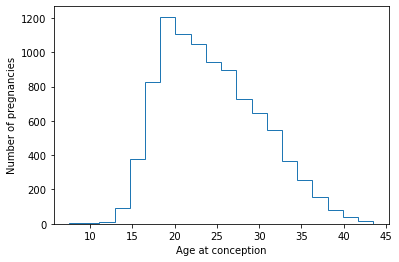

In [10]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

### Compute birth weight
Instructions:
<ul>
<li>Make a Boolean Series called full_term that is true for babies with 'prglngth' greater than or equal to 37 weeks.</li>
<li>Use full_term and birth_weight to select birth weight in pounds for full-term babies. Store the result in full_term_weight.</li>
<li>Compute the mean weight of full-term babies.</li>
</ul>

In [13]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

### Filter
Instructions:
<ul>
<li>Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.</li>
<li>Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.</li>
<li>For comparison, select multiple, full-term babies and compute their mean birth weight.</li>
</ul>

In [ ]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

## 2. Distributions

## 3. Structuring written reports

## 4. Multivariate Thinking